# Чтение и сохранение графов

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.org/documentation/stable/reference/readwrite/index.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_array.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.json_graph.node_link_data.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.graphml.write_graphml.html
* Датасеты с сетями:
    * http://networkrepository.com
    * http://konect.cc/networks/
    * https://snap.stanford.edu/data/
    * https://networkdata.ics.uci.edu/resources.php
    * https://kateto.net/2016/05/network-datasets/

## Вопросы для совместного обсуждения

1\. Обсудите работу с популярными форматами для хранения графов.

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

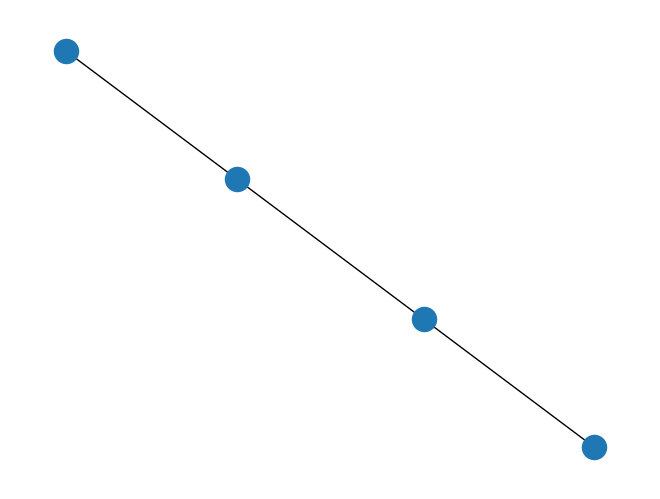

In [2]:
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3)])
nx.draw(G)

In [ ]:
A = nx.adjacency_matrix(G).toarray()

In [ ]:
A

array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
nx.write_edgelist(G, "g.edgelist")

In [ ]:
G = nx.read_edgelist(
    "g.edgelist",
    comments="%",
    nodetype=int,
    create_using=nx.DiGraph
)
G.nodes
type(G)

networkx.classes.digraph.DiGraph

In [ ]:
# G.to_directed()

## Задачи для самостоятельного решения

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import networkx as nx
import numpy as np

<p class="task" id="1"></p>

1\. Загрузите матрицу смежности графа из файла `weighted_wheel.npy` и создайте на ее основе граф.  Выведите на экран количество узлов и связей графа. Выведите на экран тип графа (nx.Graph, nx.DiGraph, ...). Выведите на экран словарь со значениями атрибута `weight` на ребрах.

- [x] Проверено на семинаре

In [ ]:
file_path = '/content/drive/My Drive/weighted_wheel.npy'

In [ ]:
adj_matrix = np.load(file_path)

In [ ]:
adj_matrix

array([[0., 2., 0., 1., 3., 3., 1., 4., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 1.],
       [1., 2., 0., 4., 0., 0., 0., 0., 0., 0.],
       [3., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 1., 0., 4., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [4., 0., 0., 0., 0., 3., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 4., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [3., 0., 0., 0., 0., 0., 0., 0., 4., 0.]])

In [ ]:
G = nx.from_numpy_array(adj_matrix)

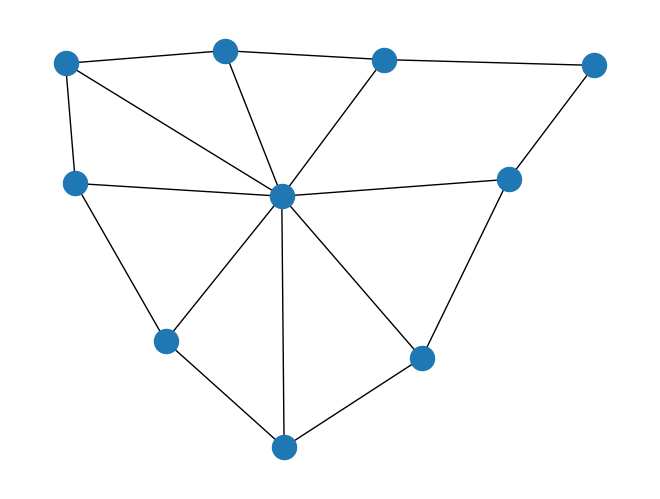

In [ ]:
nx.draw(G)

In [ ]:
len(G.nodes)

10

In [ ]:
len(G.edges)

17

In [ ]:
# h=nx.DiGraph()
# type(h)

networkx.classes.digraph.DiGraph

In [ ]:
type(G)

networkx.classes.graph.Graph

In [ ]:
# G.edges(data = 'weight')

OutEdgeDataView([(0, 1, 2.0), (0, 3, 1.0), (0, 4, 3.0), (0, 7, 4.0), (1, 2, 2.0), (1, 9, 1.0), (2, 0, 1.0), (2, 3, 4.0), (3, 0, 3.0), (3, 2, 2.0), (4, 0, 3.0), (4, 5, 4.0), (5, 0, 1.0), (5, 6, 3.0), (6, 0, 4.0), (6, 5, 3.0), (6, 7, 2.0), (7, 6, 3.0), (7, 8, 4.0), (8, 7, 2.0), (9, 0, 3.0)])

In [ ]:
nx.get_edge_attributes(G,'weight')

{(0, 1): 2.0,
 (0, 3): 3.0,
 (0, 4): 3.0,
 (0, 5): 1.0,
 (0, 6): 4.0,
 (0, 7): 4.0,
 (0, 2): 1.0,
 (0, 9): 3.0,
 (1, 2): 2.0,
 (1, 9): 1.0,
 (2, 3): 2.0,
 (3, 4): 1.0,
 (4, 5): 4.0,
 (5, 6): 3.0,
 (6, 7): 3.0,
 (7, 8): 2.0,
 (8, 9): 4.0}

<p class="task" id="2"></p>

2\. Загрузите матрицу смежности графа из файла `weighted_oriented_wheel.npy` и создайте на ее основе ориентированный граф.  Визуализируйте граф. Выведите на экран тип графа (nx.Graph, nx.DiGraph, ...). Получите матрицу смежности загруженного графа и покажите, что она не является симметричной.

- [x] Проверено на семинаре

In [ ]:
file_path = '/content/drive/My Drive/weighted_oriented_wheel.npy'

In [ ]:
adj_matrix = np.load(file_path)

In [ ]:
adj_matrix

array([[0., 2., 0., 1., 3., 0., 0., 4., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 4., 0., 0., 0., 0., 0., 0.],
       [3., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [4., 0., 0., 0., 0., 3., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 4., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [3., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

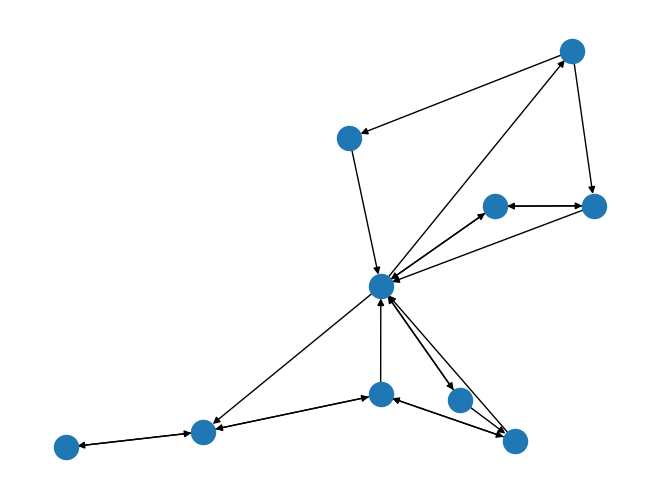

In [ ]:
nx.draw(G)

In [ ]:
type(G)

networkx.classes.digraph.DiGraph

In [ ]:
adj_matrix = nx.to_numpy_array(G)
adj_matrix_t = adj_matrix.T

In [ ]:
adj_matrix

array([[0., 2., 0., 1., 3., 0., 0., 4., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 4., 0., 0., 0., 0., 0., 0.],
       [3., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [4., 0., 0., 0., 0., 3., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 4., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [3., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
adj_matrix_t

array([[0., 0., 1., 3., 3., 1., 4., 0., 0., 3.],
       [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 2., 0., 0., 0., 0., 0., 0.],
       [1., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 4., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 3., 0., 0.],
       [4., 0., 0., 0., 0., 0., 2., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 4., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
(adj_matrix ==  adj_matrix_t).all()

False

In [ ]:
# => не симметричный

<p class="task" id="3"></p>

3\. Загрузите информацию о ребрах графа из файла `data/karate.edgelist` и создайте на ее основе граф. При создании графа приведите идентификаторы узлов к числовому типу. Выведите на экран количество узлов и ребер загруженного графа, выведите на экран список узлов графа. Загрузите граф карате-клуба при помощи функции `nx.karate_club_graph`. Сравните две матрицы смежности (загруженного из файла графа и графа, созданного функцией) и покажите, что они одинаковые. При создании матриц смежности учтите, что порядок следования узлов в графах может различаться.  

- [ ] Проверено на семинаре

In [30]:
file_path = '/content/drive/My Drive/karate.edgelist'

In [31]:
G = nx.read_edgelist(file_path, nodetype=int, delimiter = '/')

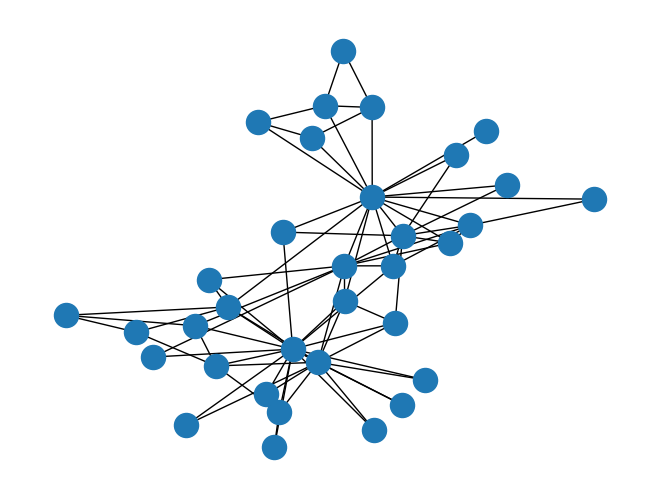

In [32]:
nx.draw(G)

In [33]:
len(G.nodes)

34

In [34]:
len(G.edges)

78

In [35]:
list(G.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 17,
 19,
 21,
 31,
 30,
 9,
 27,
 28,
 32,
 16,
 33,
 14,
 15,
 18,
 20,
 22,
 23,
 25,
 29,
 24,
 26]

In [36]:
G1 = nx.karate_club_graph()

In [37]:
l = sorted(G)
l1 = sorted(G1)

In [38]:
m1= nx.to_numpy_array(G, nodelist = l)
m2= nx.to_numpy_array(G1, nodelist = l1)

In [39]:
(m1==m2).all()

True

<p class="task" id="4"></p>

4\. Загрузите граф Wikibooks edits (qu) с сайта http://konect.cc/. При чтении назовите атрибуты на ребрах `x` и `y` и преобразуйте их в числа. Выведите на экран количество узлов и ребер загруженного графа, выведите на экран список узлов графа. Выведите на экран информацию о ребрах и их атрибутах. Преобразуйте граф в словарь при помощи функции `node_link_data`, удалите информацию об атрибутах `x` и `y` из полученного представления и сохраните его в JSON файл.

- [ ] Проверено на семинаре

In [64]:
import json

In [50]:
file_path = '/content/drive/My Drive/out.edit-quwikibooks'

In [52]:
G = nx.read_edgelist(file_path, comments='%', delimiter='\t', nodetype = int, data=[('x', int), ('y', int)] )

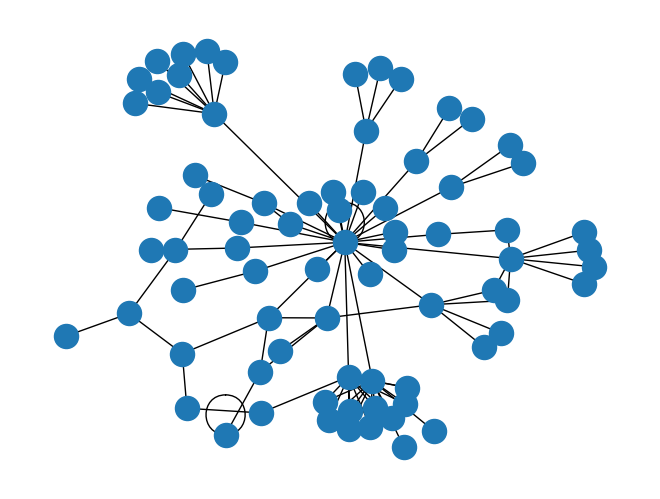

In [53]:
nx.draw(G)

In [54]:
len(G.nodes), len(G.edges)

(75, 95)

In [56]:
list(G.nodes)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

In [60]:
for edge in G.edges(data=True):
    print(edge)


(1, 1, {'x': 1, 'y': 1196376970})
(1, 4, {'x': 1, 'y': 1196376993})
(1, 5, {'x': 1, 'y': 1201269377})
(1, 10, {'x': 1, 'y': 1196339644})
(1, 11, {'x': 1, 'y': 1189963912})
(1, 12, {'x': 1, 'y': 1196349723})
(1, 13, {'x': 1, 'y': 1189964085})
(1, 14, {'x': 1, 'y': 1189965633})
(1, 15, {'x': 1, 'y': 1189964620})
(1, 16, {'x': 1, 'y': 1189964966})
(1, 17, {'x': 1, 'y': 1189964705})
(1, 18, {'x': 1, 'y': 1189965897})
(1, 20, {'x': 1, 'y': 1196339617})
(1, 21, {'x': 1, 'y': 1192445619})
(1, 22, {'x': 1, 'y': 1196327700})
(1, 23, {'x': 1, 'y': 1192720101})
(1, 24, {'x': 1, 'y': 1196375735})
(1, 25, {'x': 1, 'y': 1192720193})
(1, 26, {'x': 1, 'y': 1192720352})
(1, 27, {'x': 1, 'y': 1192720512})
(1, 30, {'x': 1, 'y': 1198775881})
(1, 33, {'x': 1, 'y': 1195474109})
(1, 35, {'x': 1, 'y': 1196350447})
(1, 36, {'x': 1, 'y': 1196375432})
(1, 37, {'x': 1, 'y': 1196375700})
(1, 39, {'x': 1, 'y': 1198776196})
(2, 2, {'x': 1, 'y': 1133661392})
(2, 3, {'x': 1, 'y': 1133661420})
(3, 4, {'x': 1, 'y': 1154

In [61]:
graph_dict = nx.node_link_data(G)

In [62]:
graph_dict

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8},
  {'id': 9},
  {'id': 10},
  {'id': 11},
  {'id': 12},
  {'id': 13},
  {'id': 14},
  {'id': 15},
  {'id': 16},
  {'id': 17},
  {'id': 18},
  {'id': 19},
  {'id': 20},
  {'id': 21},
  {'id': 22},
  {'id': 23},
  {'id': 24},
  {'id': 25},
  {'id': 26},
  {'id': 27},
  {'id': 28},
  {'id': 29},
  {'id': 30},
  {'id': 31},
  {'id': 32},
  {'id': 33},
  {'id': 34},
  {'id': 35},
  {'id': 36},
  {'id': 37},
  {'id': 38},
  {'id': 39},
  {'id': 40},
  {'id': 41},
  {'id': 42},
  {'id': 43},
  {'id': 44},
  {'id': 45},
  {'id': 46},
  {'id': 47},
  {'id': 48},
  {'id': 49},
  {'id': 50},
  {'id': 51},
  {'id': 52},
  {'id': 53},
  {'id': 54},
  {'id': 55},
  {'id': 56},
  {'id': 57},
  {'id': 58},
  {'id': 59},
  {'id': 60},
  {'id': 61},
  {'id': 62},
  {'id': 63},
  {'id': 64},
  {'id': 65},
  {'id': 66},
  {'id': 67},
  {'id

In [63]:
for node in graph_dict['links']:
    del node['x']
    del node['y']

In [122]:
graph_dict

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8},
  {'id': 9},
  {'id': 10},
  {'id': 11},
  {'id': 12},
  {'id': 13},
  {'id': 14},
  {'id': 15},
  {'id': 16},
  {'id': 17},
  {'id': 18},
  {'id': 19},
  {'id': 20},
  {'id': 21},
  {'id': 22},
  {'id': 23},
  {'id': 24},
  {'id': 25},
  {'id': 26},
  {'id': 27},
  {'id': 28},
  {'id': 29},
  {'id': 30},
  {'id': 31},
  {'id': 32},
  {'id': 33},
  {'id': 34},
  {'id': 35},
  {'id': 36},
  {'id': 37},
  {'id': 38},
  {'id': 39},
  {'id': 40},
  {'id': 41},
  {'id': 42},
  {'id': 43},
  {'id': 44},
  {'id': 45},
  {'id': 46},
  {'id': 47},
  {'id': 48},
  {'id': 49},
  {'id': 50},
  {'id': 51},
  {'id': 52},
  {'id': 53},
  {'id': 54},
  {'id': 55},
  {'id': 56},
  {'id': 57},
  {'id': 58},
  {'id': 59},
  {'id': 60},
  {'id': 61},
  {'id': 62},
  {'id': 63},
  {'id': 64},
  {'id': 65},
  {'id': 66},
  {'id': 67},
  {'id

In [65]:
output = "graph.json"
with open(output, 'w') as f:
    json.dump(graph_dict, f)

<p class="task" id="5"></p>

5\. Загрузите граф из файла `data/people.xml`. Идентификатором узла выступает значение атрибута `id`. Значения тегов `age` и `salary` храните в виде атрибутов узлов. Для связей значение тега `type` храните в виде отдельного атрибута ребра. Визуализируйте граф. Сохраните созданный граф в формате graphml.

- [ ] Проверено на семинаре

In [67]:
import xml.etree.ElementTree as ET

In [100]:
file_path = '/content/drive/My Drive/people.xml'

In [101]:
tree = ET.parse(file_path)
root = tree.getroot()

In [102]:
# <graph>
# <!--  Nodes  -->
# <node id="person1">
# <age>30</age>
# <salary>50000</salary>
# </node>
# <node id="person2">
# <age>25</age>
# </node>
# <node id="person3">
# <age>40</age>
# <salary>75000</salary>
# </node>
# <node id="person4">
# <age>35</age>
# </node>
# <!--  Edges  -->
# <edge source="person1" target="person2" type="friends"/>
# <edge source="person1" target="person3" type="work"/>
# <edge source="person3" target="person4" type="family"/>
# </graph>

In [129]:
G = nx.DiGraph()

In [130]:
for node in root.findall('node'):
    node_id = node.get('id')
    age = node.find('age').text
    if node.find('salary'):
        salary = node.find('salary').text
        G.add_node(node_id, age=age, salary=salary)
    else:
        G.add_node(node_id, age=age)



In [131]:
for edge in root.findall('edge'):
    source = edge.get('source')
    target = edge.get('target')
    edge_type = edge.get('type')
    G.add_edge(source, target, type=edge_type)

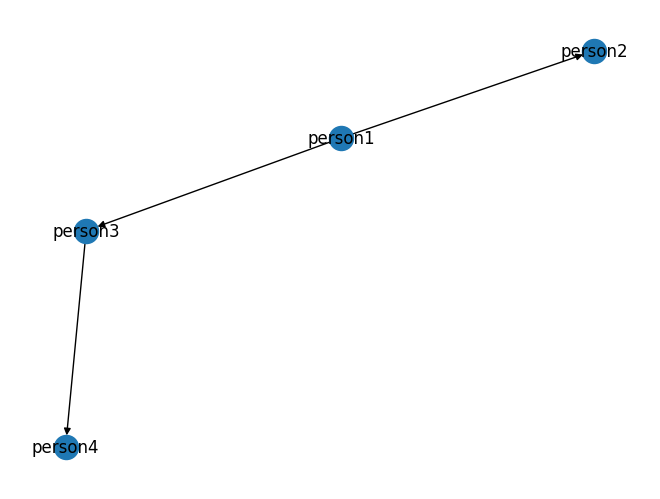

In [132]:
nx.draw(G, with_labels = True)

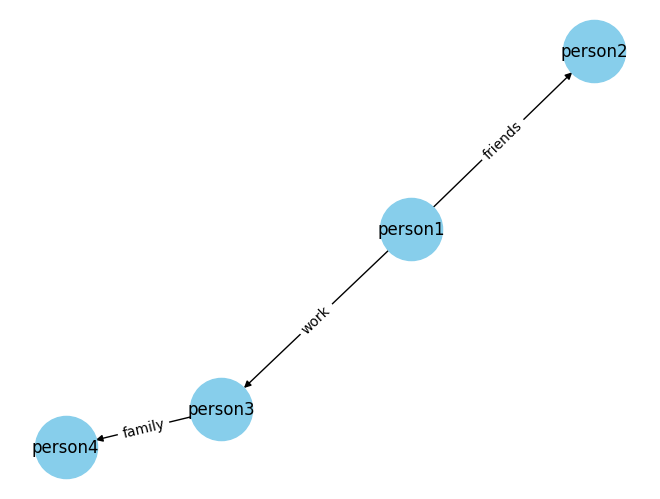

In [133]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue')
edge_labels = nx.get_edge_attributes(G, 'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [134]:
nx.write_graphml(G, 'people.graphml')